In [ ]:
#!pip install fosforml snowflake  snowflake-connector-python snowflake-snowpark-python snowflake-snowpark-python[pandas] seaborn matplotlib numpy pandas scikit-learn refractio refractml refractio[snowflake]

In [2]:
pip freeze

anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.15.0
beautifulsoup4==4.12.3
bleach==6.1.0
Brotli==1.0.9
certifi==2024.7.4
cffi==1.16.0
charset-normalizer==3.3.2
comm==0.2.2
conda==23.1.0
conda-content-trust==0.1.3
conda-package-handling==2.3.0
conda-package-streaming==0.10.0
cryptography==42.0.5
debugpy==1.8.2
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.2
executing==2.0.1
fastjsonschema==2.20.0
h11==0.14.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
importlib-metadata==8.2.0
ipykernel==6.29.5
ipython==8.18.1
ipywidgets==8.1.3
jedi==0.19.1
jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter==1.0.0
jupyter-client==8.6.2
jupyter-console==6.6.3
jupyter-core==5.7.2
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter-server==2.14.2
jupyter-server-terminals==0.5.3
jupyterlab==4.2.4
jupyterlab-pygments==0.3.0
jupyterlab-server==2.27.3
jupyterlab-widgets==3.0.11
Mark

In [3]:
!pip install fosforml
!pip install 'scikit-learn==1.5.*'

  Using cached https://files.pythonhosted.org/packages/5c/3a/3bb6c364e2bc00e59b85d2b8057d3ad5f409c00714999eedfa52df801e0b/fosforml-1.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/15/80/44286939ca215e88fa827b2aeb6fa3fd2b4a7af322485c7170d6f9fd96e0/cloudpickle-2.2.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/80/72/c0fa5a9bc811a59a5a1c7113ff89676ed1629d7d6463db8c1a8c97a8b5f6/snowflake_ml_python-1.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/25/89/dce01a35d354159dcc901e3c7e7eb3fe98de5cb3639c6cd39518d8830caa/scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8c/3a/c9c5d4d5c49b132ef15ac7b5ccf56ef1c82efe36cd19414771762e97c00e/xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb13a2b0eb036476a213b0000837d0e/retrying-1.3.4-py3-none-any.whl
  

In [1]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [2]:
table_name = 'SALARY_DATA'
sf_df = my_session.sql("select * from {}".format(table_name))
salaryDataset =  sf_df.to_pandas()
salaryDataset

,YEARSEXPERIENCE,SALARY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
X = salaryDataset[["YEARSEXPERIENCE"]]
y = salaryDataset[["SALARY"]]

In [4]:
#from sklearn.preprocessing import train_test_split
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
#help(sklearn.model_selection.train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#help(model)

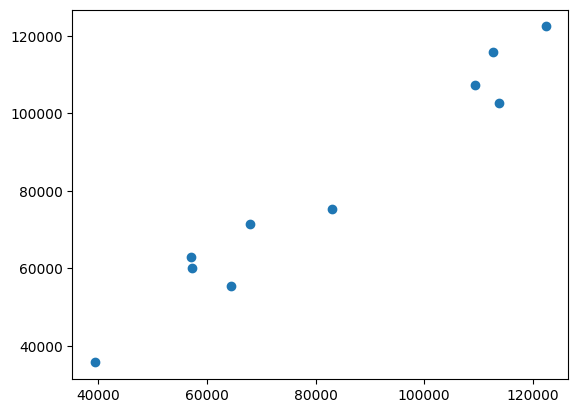

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.show()

In [7]:
from fosforml import register_model

In [8]:
import pandas as pd
y_pred_df = pd.DataFrame(y_pred , columns = ['salary_pred'])

In [9]:
register_model(
  model_obj=model,
  session=my_session,
  x_train=X_train,
  y_train=y_train,
  x_test=X_test,
  y_test=y_test,
  y_pred=y_pred_df,
  source="Notebook",
  dataset_name="SALARY_DATA",
  dataset_source="Snowflake",
  name="Salary_Prediction",
  description="This model is to predict the salary based on experinece",
  flavour="sklearn",
  model_type="regression",
  conda_dependencies=["scikit-learn==1.5.2"]
)

Got error object of type 'NoneType' has no len() when trying to read default values from function: <function explained_variance_score.<locals>.explained_variance_score_anon_sproc at 0x7f3eb6d34940>. Proceeding without creating optional arguments


Calculating build time metrics

Progress: ██████████████████                                                     25.0%


The version of package 'scikit-learn' in the local environment is 1.5.2, which does not fit the criteria for the requirement 'scikit-learn==1.5.*'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'snowflake-snowpark-python' in the local environment is 1.22.1, which does not fit the criteria for the requirement 'snowflake-snowpark-python'. Your UDF might not work when the package version is different between the server and your local environment.


Calculating build time metrics

Progress: ███████████████████████████████████                                    50.0%
Calculating build time metrics

Progress: ████████████████████████████████████████████████████                   75.0%
Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


'Failed to register model \'MODEL_46A4093A_1F96_4004_BC9D_7FA7357542FB_FDC_SALARY_PREDICTION\'. (1300) (1304): 01b71cc5-0610-e5b8-0072-f3031164b84e: 391546 (XX000): SQL compilation error: Cannot create a Python function with the specified packages. Please check your packages specification and try again. \'One or more package conflicts were detected.\'. Hint: These packages are available in other python runtimes:["cloudpickle<3,>=2.2"->[3.8, 3.10, 3.11], "pandas<3,>=1.0.0"->[3.8, 3.10, 3.11], "snowflake-ml-python<2,>=1.5"->[3.8, 3.10, 3.11], "scikit-learn<2,>=1.5"->[3.10, 3.11], "snowflake-snowpark-python<2,>=1.11.1"->[3.8, 3.10, 3.11], "typing-extensions<5,>=4.1.0"->[3.8, 3.10, 3.11], "numpy<2,>=1.23"->[3.8, 3.10, 3.11], "anyio<4,>=3.5.0"->[3.8, 3.10, 3.11], "pyyaml<7,>=6.0"->[3.8, 3.10, 3.11], "packaging<24,>=20.9"->[3.8, 3.10, 3.11], "absl-py<2,>=0.15"->[3.8, 3.10, 3.11]].'

In [70]:
# from snowflake.ml.registry import Registry

# registry = Registry(session=session, database_name=current_db, schema_name=current_schema)
# registry.log_model(
#     model_name="Salary_Prediction_Model",
#     model=model,
#     version_name = "V1",
#     comment="A simple linear regression model",
#     sample_input_data = [[5.2]]
# )
# #help(Registry.log_model)

c:\Users\chauh\AppData\Local\Programs\Python\Python38\lib\contextlib.py:113: UserWarning: `relax_version` is not set and therefore defaulted to True. Dependency version constraints relaxed from ==x.y.z to >=x.y, <(x+1). To use specific dependency versions for compatibility, reproducibility, etc., set `options={'relax_version': False}` when logging the model.
  return next(self.gen)


In [11]:
# Install snowflake-ml-python
from snowflake.ml.registry import registry

reg = registry.Registry(session=my_session, database_name='AMAZON_DB', schema_name='AMAZON_SCHEMA')
mv = reg.get_model("SALARY_PREDICTION_MODEL").version('V1')
mv.run([[10.2]], function_name='PREDICT')

,output_feature_0
0,121469.930824
